In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




In [258]:
df=pd.read_csv('Housing.csv')

In [259]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [260]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [262]:
df.shape

(545, 13)

In [263]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [264]:
df.duplicated().sum()

0

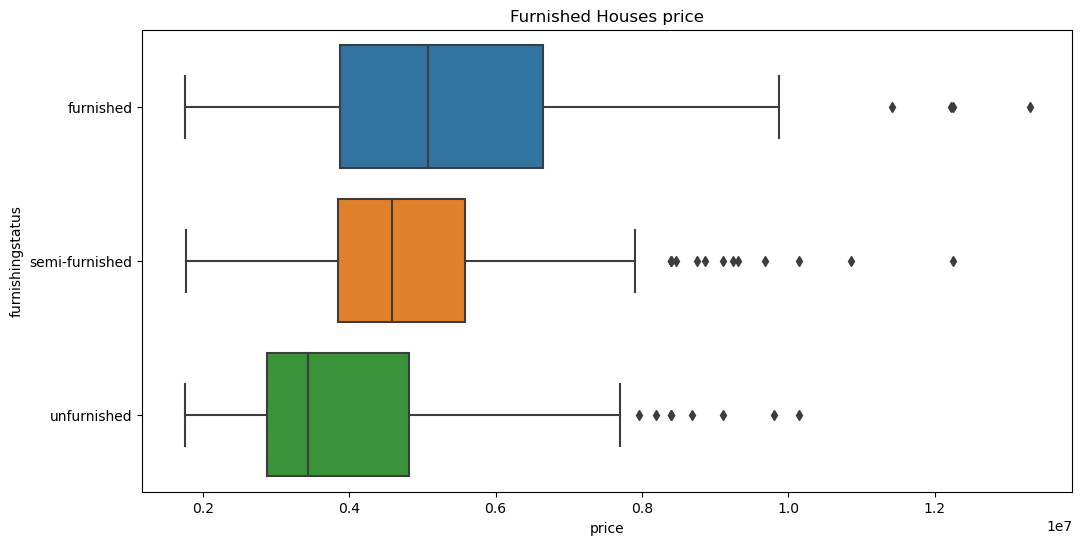

In [265]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='furnishingstatus', data=df)
plt.title('Furnished Houses price')
plt.show()

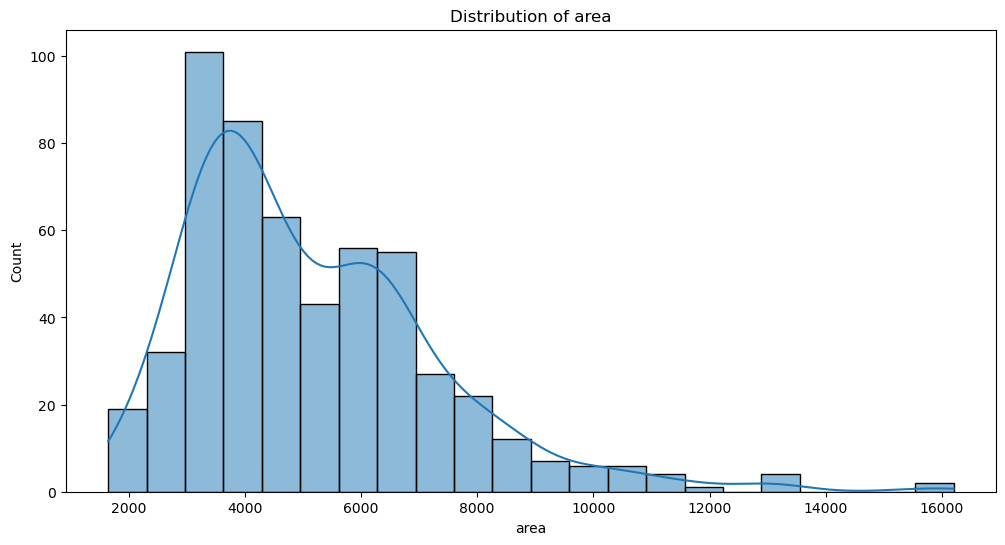

In [266]:
plt.figure(figsize=(12, 6))
sns.histplot(df['area'],  kde=True)
plt.title('Distribution of area')
plt.show()


C:\Users\hoori\AppData\Local\Temp\ipykernel_13396\1610337201.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


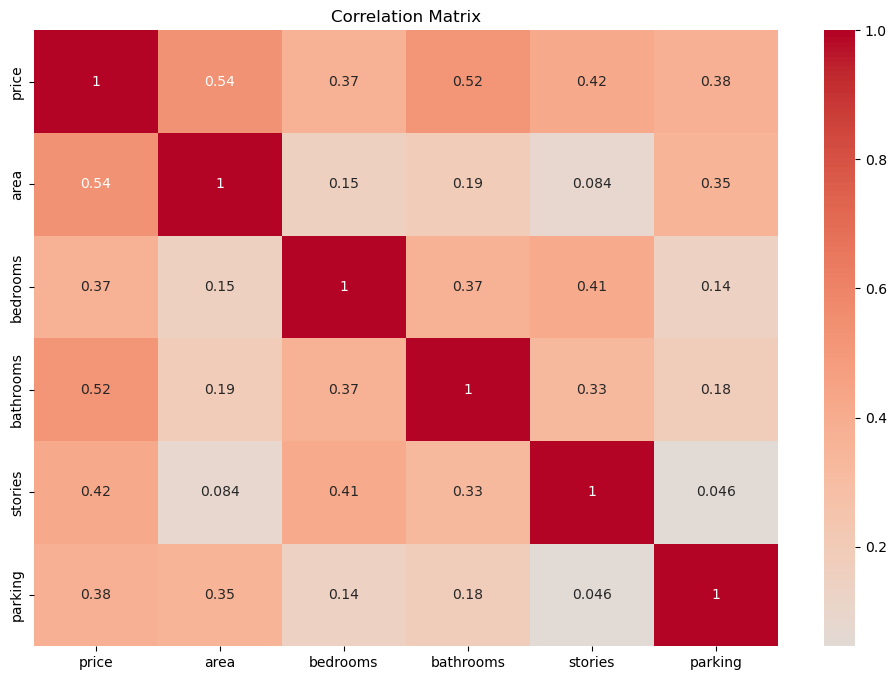

In [267]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


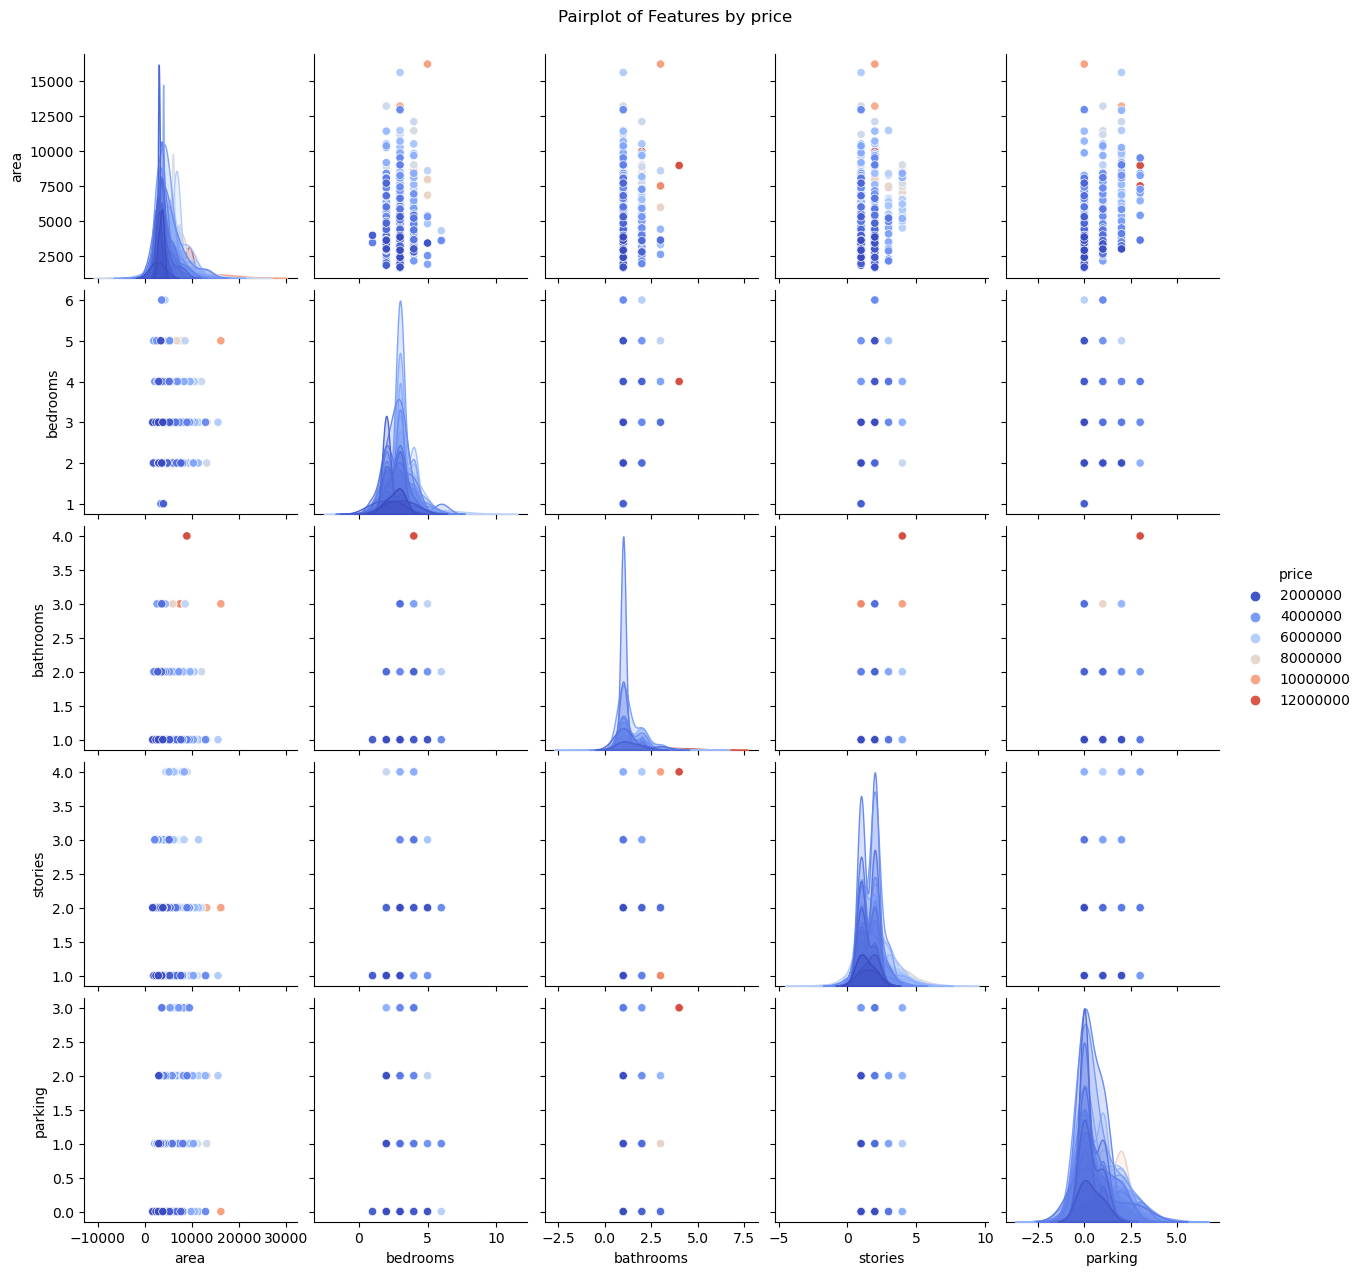

In [268]:
sns.pairplot(df, hue='price', palette='coolwarm')
plt.suptitle('Pairplot of Features by price', y=1.02)
plt.show()


In [269]:
encode = LabelEncoder()
encode_col=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']
for col in encode_col:
    df[col]=encode.fit_transform(df[col])

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [270]:

x = df.drop(columns=['price'], axis=1)  
y = df['price']  

scaler = StandardScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1,1))

In [271]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [272]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [273]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

In [274]:
#accuracy = accuracy_score(y_test, y_pred)
#print("\nAccuracy:", accuracy)

MSE= mean_squared_error(y_test,y_pred)
accuracy=r2_score(y_test,y_pred)
lin_reg.score(X_test,y_test)
#f1=f1_score(y_test,y_pred)
#accuracy_accuracy=accuracy_score(y_test,y_pred)

print('MSE',MSE)
print('Accuracy',accuracy)
#print('f1 score',f1)
#print('Accuracy score',accuracy_accuracy)


MSE 0.507356154875056
Accuracy 0.6494754192267794


optional part
just tried to do it 

In [275]:

# save the model
import joblib

joblib.dump(lin_reg, 'HousePriceModel.pkl')

['HousePriceModel.pkl']

Prediction

In [276]:
import numpy as np
model=joblib.load('HousePriceModel.pkl')
scaler=joblib.load('scaler.pkl')

In [277]:
area            = 7420
bedrooms        = 4
bathrooms       = 2
stories         = 3
mainroad        = 1
guestroom       = 0
basement        = 0
hotwaterheating = 0
airconditioning = 1
parking         = 2
prefarea        = 1
furnishingstatus= 1


In [278]:
custom_values = np.array([[area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating,airconditioning,parking,prefarea,furnishingstatus]])
prediction = model.predict(custom_values)

print(f"Predicted Price: {prediction}")

Prediction: [[2032.19346319]]
